In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found

inspector = inspect(engine)
inspector.get_table_names()

print("measurement columns")

columns_m = inspector.get_columns('measurement')
for column in columns_m:
    print(column["name"], column["type"])
    
print("----------------------")

print("station columns")

columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column["name"], column["type"])
    

measurement columns
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------------
station columns
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table
mm = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

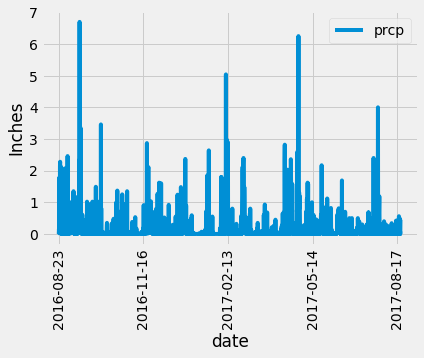

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# all results
full_results = session.query(mm.date, mm.station, mm.prcp, mm.tobs).order_by(mm.date).all()
# print(results[-1])

#Sort values in tuples into relevant lists. 
date = []
station_name = []
rain = []
tobs = []
date_data = []


for r in full_results:
    date.append(r[0])
    station_name.append(r[1])
    rain.append(r[2])
    tobs.append(r[3])


#print(date[-1])    
    
# Calculate the date 1 year ago from the last data point in the database
last_date = date[-1]
#print(last_date)
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(year_before)

# Perform a query to retrieve the data and precipitation scores
results = session.query(mm.date, mm.prcp).filter(mm.date >= year_before).order_by(mm.date).all()


precip_data = pd.DataFrame(results, columns=["date", "prcp"])

#station_count = precip_data

prcp_data = precip_data.dropna()

prcp_data.set_index(['date'])


# # Sort the dataframe by date

precipitation = prcp_data.sort_values(by=['date'])
precipitation

# Use Pandas Plotting with Matplotlib to plot the data


precipitation.plot(x='date', rot=90)
plt.ylabel('Inches')

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()


In [ ]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id, Station.station, Station.name).count()
print(stations)


# station columns
# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

act_sta = session.query(mm.station, func.count(mm.prcp), func.count(mm.tobs)).group_by(mm.station).\
order_by(func.count(mm.prcp).desc()).all()
act_sta

#print(([func.count(mm.station)]))

# measurement columns
# id INTEGER
# station TEXT
# date TEXT
# prcp FLOAT
# tobs FLOAT

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

low_temp = session.query(mm.station, func.min(mm.tobs)).filter(mm.station == 'USC00519281').all()
high_temp = session.query(mm.station, func.max(mm.tobs)).filter(mm.station == 'USC00519281').all()
avg_temp = session.query(mm.station, func.avg(mm.tobs)).filter(mm.station == 'USC00519281').all()

print(f'The most active station is USC00519281 with a high temp of {high_temp}, low of {low_temp} and is {avg_temp} on average' )

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(mm.station, mm.date, mm.tobs).filter(mm.station == 'USC00519281').\
filter(mm.date >= '2016-08-23' ).order_by(mm.date).all()

#Sort values in tuples into relevant lists. 
station_name = []
date = []
tobs = []

for r in temp_data:
    station_name.append(r[0])
    date.append(r[1]) 
    tobs.append(r[2])

temp_data = pd.DataFrame({"Date" : date,
                           "Station" : station_name, 
                            "Temp" : tobs})    

#bins = [1,2,3,4,5,6,7,8,9,10,11,12]
temps = temp_data['Temp']

plt.hist(temps)
plt.xlabel = ("Temps")
plt.ylabel = ('Counts')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
